In [38]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape, Point
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm
import urllib.request, json
import requests
import urllib.parse

import warnings
warnings.filterwarnings('ignore')

In [2]:
tt = pd.read_csv('../Data/weighted_tt.csv', index_col = 0)
tt.head()

,geoid,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,...,CBD16,CBD17,CBD18,CBD19,CBD20,CBD21,CBD22,w_tt,mean_tt,min_tt
0,36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,...,23.0,27.0,25.0,15.0,19.0,13.0,38.0,18.237742,25.409091,3.0
1,36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,...,20.0,27.0,22.0,22.0,19.0,17.0,38.0,16.932766,24.545455,10.0
2,36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,...,21.0,28.0,22.0,27.0,22.0,17.0,39.0,18.211283,25.045455,12.0
3,36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,...,15.0,18.0,19.0,18.0,21.0,16.0,43.0,13.227767,19.863636,7.0
4,36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,...,32.0,36.0,36.0,11.0,17.0,6.0,51.0,28.875500,31.590909,6.0


In [3]:
tt[tt['mean_tt'].isna()]

,geoid,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,...,CBD16,CBD17,CBD18,CBD19,CBD20,CBD21,CBD22,w_tt,mean_tt,min_tt
773,36047085200,852.00,3,Brooklyn,85200,3085200,I,BK99,park-cemetery-etc-Brooklyn,4010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1145,36081023200,232.00,4,Queens,23200,4023200,I,QN35,Briarwood-Jamaica Hills,4106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1412,36081091601,916.01,4,Queens,91601,4091601,I,QN10,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,4114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1561,36047017500,175.00,3,Brooklyn,17500,3017500,I,BK99,park-cemetery-etc-Brooklyn,4012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [4]:
tt.columns

Index(['geoid', 'ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt'],
      dtype='object')

In [5]:
tt = tt[~tt['mean_tt'].isna()].reset_index()
tt.to_csv('../Data/weighted_tt_dropna.csv')

In [6]:
len(tt)

2037

In [7]:
N = len(tt)
diff_weighted_mat = np.zeros((N,N))
diff_mean_mat = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        diff_weighted_mat[i,j] = abs(tt['w_tt'][i]-tt['w_tt'][j])
        diff_mean_mat[i,j] = abs(tt['mean_tt'][i]-tt['mean_tt'][j])

In [8]:
diff_weighted_mat[0,:100]

array([0.00000000e+00, 1.30497671e+00, 2.64591870e-02, 5.00997528e+00,
       1.06377571e+01, 1.28982742e+01, 1.72335534e+01, 1.85731047e+01,
       2.49676207e+01, 7.96686884e+00, 3.53800255e+01, 3.24532084e+01,
       2.23872002e+01, 2.38421596e+01, 2.86989460e+01, 2.74992338e+01,
       2.87546195e+01, 3.07546195e+01, 1.92710950e+01, 1.82508182e+01,
       1.72860407e+01, 1.72860407e+01, 2.16567983e+01, 3.76701209e+01,
       3.62262498e+01, 3.35998302e+01, 3.40414711e+01, 1.84838167e+01,
       3.78900223e+01, 4.02341610e+01, 4.28043816e+01, 2.98278025e+01,
       2.69204033e+01, 1.97797973e+01, 3.18364160e+01, 3.07062269e+01,
       3.07604602e+01, 3.18373739e+01, 1.84702772e+01, 3.65286197e+01,
       1.75787761e+01, 3.28346650e+01, 3.76669270e+01, 3.61462620e+01,
       2.25753721e+01, 3.96714055e+01, 2.33873449e+01, 1.98509184e+01,
       4.17130894e+01, 4.22262498e+01, 1.84332479e+01, 3.37862724e+01,
       2.73319827e+01, 3.65869319e+01, 3.65869319e+01, 2.31683443e+01,
      

In [9]:
diff_mean_mat[0,:100]

array([ 0.        ,  0.86363636,  0.36363636,  5.54545455,  6.18181818,
        8.54545455, 11.86363636, 17.54545455, 22.09090909,  6.22727273,
       32.36363636, 29.45454545, 19.5       , 21.5       , 26.31818182,
       24.68181818, 26.45454545, 28.45454545, 16.36363636, 15.59090909,
       14.90909091, 14.90909091, 18.95454545, 36.59090909, 34.77272727,
       31.90909091, 32.13636364, 13.59090909, 36.45454545, 38.77272727,
       39.40909091, 27.54545455, 25.54545455, 15.09090909, 30.31818182,
       29.09090909, 29.18181818, 30.04545455, 15.31818182, 33.72727273,
       14.95454545, 30.59090909, 35.36363636, 33.45454545, 17.77272727,
       37.40909091, 20.90909091, 17.95454545, 40.13636364, 40.77272727,
       16.13636364, 32.22727273, 25.18181818, 34.81818182, 34.81818182,
       21.90909091, 25.22727273, 40.72727273, 37.68181818, 20.18181818,
       19.5       , 21.72727273, 17.45454545, 21.31818182, 25.36363636,
       56.59090909, 42.18181818, 38.81818182, 24.86363636, 38.95

In [10]:
double_sum_weighted = np.sum(np.sum(diff_weighted_mat,axis = 1))
double_sum_mean = np.sum(np.sum(diff_mean_mat,axis = 1))

In [11]:
print(double_sum_weighted,double_sum_mean)

78252578.22660828 75869786.18181819


In [12]:
w_tt_mean = tt['w_tt'].mean()
mean_tt_mean = tt['mean_tt'].mean()
Gini_w = double_sum_weighted/(2*N**2*w_tt_mean)
Gini_mean = double_sum_mean/(2*N**2*mean_tt_mean)

In [13]:
print(Gini_w,Gini_mean)

0.18495369134561235 0.16507275073140124


In [14]:
def get_gini(tt_df,geo_colnm):
    if geo_colnm == None:
        N = len(tt_df)
        diff_weighted_mat = np.zeros((N,N))
        diff_mean_mat = np.zeros((N,N))
        diff_min_mat = np.zeros((N,N))
        
        for i in range(N):
            for j in range(N):
                diff_weighted_mat[i,j] = abs(tt['w_tt'][i]-tt['w_tt'][j])
                diff_mean_mat[i,j] = abs(tt['mean_tt'][i]-tt['mean_tt'][j])
                diff_min_mat[i,j] = abs(tt['min_tt'][i]-tt['min_tt'][j])
        
        double_sum_weighted = np.sum(np.sum(diff_weighted_mat,axis = 1))
        double_sum_mean = np.sum(np.sum(diff_mean_mat,axis = 1))
        double_sum_min = np.sum(np.sum(diff_min_mat,axis = 1))

        w_tt_mean = tt['w_tt'].mean()
        mean_tt_mean = tt['mean_tt'].mean()
        min_tt_mean = tt['min_tt'].mean()
        
        Gini_w = double_sum_weighted/(2*N**2*w_tt_mean)
        Gini_mean = double_sum_mean/(2*N**2*mean_tt_mean)
        Gini_min = double_sum_min/(2*N**2*min_tt_mean)
    else:
        print('Successfully made it to else statement')
        Gini_w = []
        Gini_mean = [] 
        Gini_min = []
        for geo in tt_df[geo_colnm].unique():
            #iterate through unique geographies and calculate gini indexes
            subset_df = tt_df[tt_df[geo_colnm] == geo].reset_index(drop = True)
            N = len(subset_df)
            diff_weighted_mat = np.zeros((N,N))
            diff_mean_mat = np.zeros((N,N))
            diff_min_mat = np.zeros((N,N))
            
            for i in range(N):
                for j in range(N):
                    diff_weighted_mat[i,j] = abs(subset_df['w_tt'][i]-subset_df['w_tt'][j])
                    diff_mean_mat[i,j] = abs(subset_df['mean_tt'][i]-subset_df['mean_tt'][j])
                    diff_min_mat[i,j] = abs(subset_df['min_tt'][i]-subset_df['min_tt'][j])

            double_sum_weighted = np.sum(np.sum(diff_weighted_mat,axis = 1))
            double_sum_mean = np.sum(np.sum(diff_mean_mat,axis = 1))
            double_sum_min = np.sum(np.sum(diff_min_mat,axis = 1))

            w_tt_mean = subset_df['w_tt'].mean()
            mean_tt_mean = subset_df['mean_tt'].mean()
            min_tt_mean = subset_df['min_tt'].mean()

            Gini_w.append(double_sum_weighted/(2*N**2*w_tt_mean))
            Gini_mean.append(double_sum_mean/(2*N**2*mean_tt_mean))
            Gini_min.append(double_sum_min/(2*N**2*min_tt_mean))
    return Gini_w,Gini_mean,Gini_min

In [15]:
w,me,mi = get_gini(tt,None)
print(w,me,mi)

0.18495369134561235 0.16507275073140124 0.27878852843195984


In [16]:
w,me,mi = get_gini(tt,'boro_name')
print(w,me,mi)

Successfully made it to else statement
[0.1789242749504022, 0.141235228917616, 0.11370621437617917, 0.15317594335550003] [0.13699820300571267, 0.1301915185175349, 0.10076414251162137, 0.13799922125546213] [0.3108375996283922, 0.22768054399039855, 0.1770844877512831, 0.23406535641778625]


In [27]:
geo_columns = [None, 'boro_name','puma','ntaname']
weighted_ginis = []
mean_ginis = []
min_ginis = []

for geo in geo_columns:
    w,me,mi = get_gini(tt,geo)
    weighted_ginis.append(w)
    mean_ginis.append(me)
    min_ginis.append(mi)

Successfully made it to else statement
Successfully made it to else statement
Successfully made it to else statement


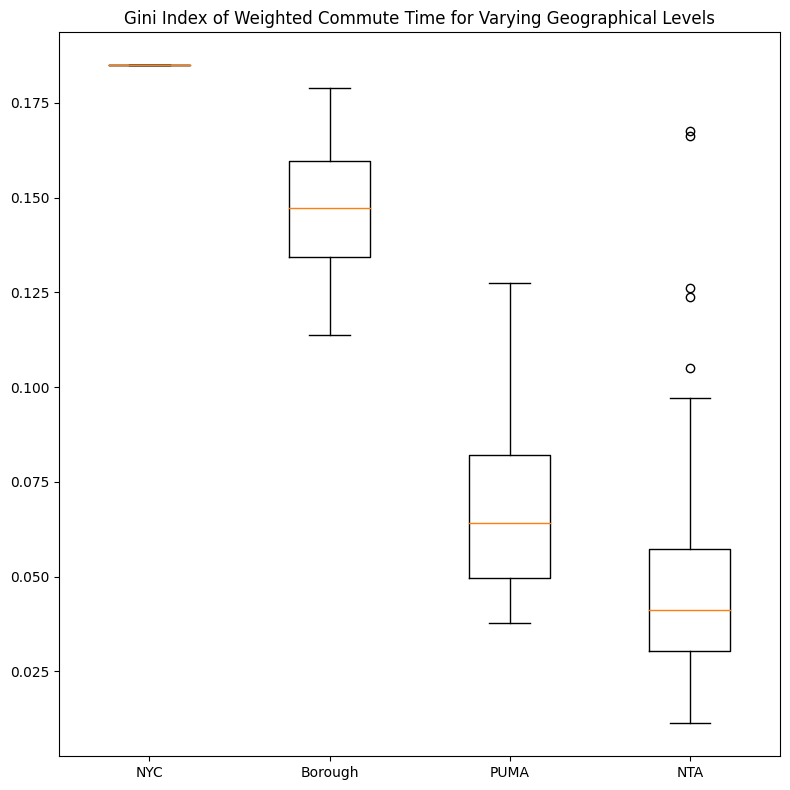

In [28]:
fig = plt.figure(figsize =(8, 8))
 
# Creating axes instance
ax = fig.add_subplot(111) 
# Creating plot
bp = ax.boxplot(weighted_ginis)
ax.set_xticklabels(['NYC','Borough','PUMA','NTA'])
ax.set_title('Gini Index of Weighted Commute Time for Varying Geographical Levels')
plt.tight_layout()
plt.savefig('../Outputs/gini_boxplot_wtt.png')
# show plot
plt.show()

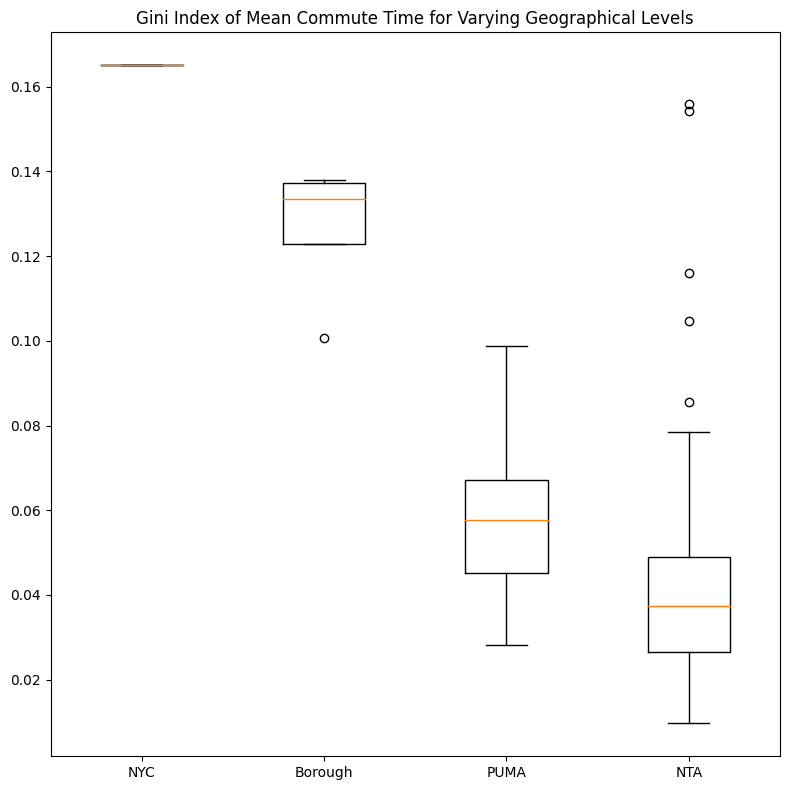

In [29]:
fig = plt.figure(figsize =(8, 8))
 
# Creating axes instance
ax = fig.add_subplot(111) 
# Creating plot
bp = ax.boxplot(mean_ginis)
ax.set_xticklabels(['NYC','Borough','PUMA','NTA'])
ax.set_title('Gini Index of Mean Commute Time for Varying Geographical Levels')
plt.tight_layout()
plt.savefig('../Outputs/gini_boxplot_meantt.png')
# show plot
plt.show()

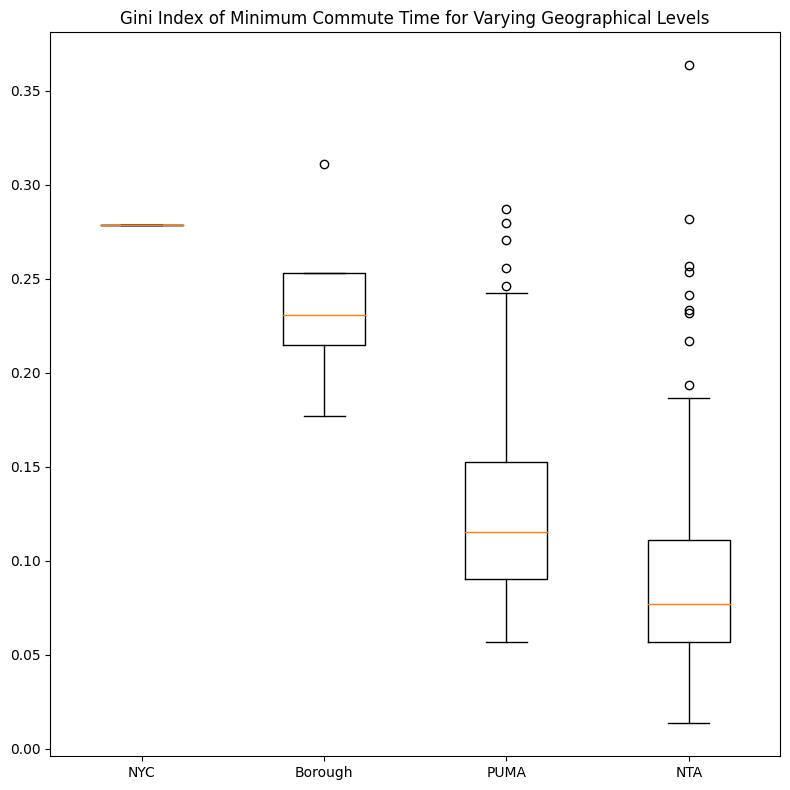

In [30]:
fig = plt.figure(figsize =(8, 8))
 
# Creating axes instance
ax = fig.add_subplot(111) 
# Creating plot
bp = ax.boxplot(min_ginis)
ax.set_xticklabels(['NYC','Borough','PUMA','NTA'])
ax.set_title('Gini Index of Minimum Commute Time for Varying Geographical Levels')
plt.tight_layout()
plt.savefig('../Outputs/gini_boxplot_mintt.png')
# show plot
plt.show()

In [31]:
geo_ls = []
for geo_colnm in geo_columns[1:]:
    geo_ls.append(tt[geo_colnm].unique().tolist())

In [145]:
geo_ls[0]

['Manhattan', 'Brooklyn', 'Bronx', 'Queens']

In [146]:
geo_ls[1][:5]

[3808, 3807, 3805, 3804, 3803]

## Import geography boundaries from NYC Open Data Portal

* Borough Boundaries: `https://data.cityofnewyork.us/resource/7t3b-ywvw.json`

* PUMA Boundaries: `https://data.cityofnewyork.us/resource/ith2-q832.json`

* NTA Boundaries: `https://data.cityofnewyork.us/resource/q2z5-ai38.json`

In [41]:
#import nta shapefile
urls = ['https://data.cityofnewyork.us/resource/7t3b-ywvw.json',
        'https://data.cityofnewyork.us/resource/ith2-q832.json',
        'https://data.cityofnewyork.us/resource/q2z5-ai38.json']
query = (urls[0]+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())


for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
boro = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
boro = boro.drop(columns = ['the_geom'])
boro.head()

,boro_code,boro_name,shape_leng,shape_area,geometry
0,5,Staten Island,325917.353702,1623620725.06,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2,Bronx,463179.772813,1187174784.85,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1,Manhattan,357564.316391,636520830.768,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3,Brooklyn,728197.541089,1934143372.64,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,888199.731579,3041418506.76,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [95]:
query = (urls[1]+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())


for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
puma = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
puma = puma.drop(columns = ['the_geom'])
puma.head()

,puma,shape_leng,shape_area,geometry
0,3701,53227.1127131,97928515.9619,"MULTIPOLYGON (((-73.89663 40.91142, -73.89663 ..."
1,3702,106167.615361,188993568.193,"MULTIPOLYGON (((-73.79323 40.88282, -73.79417 ..."
2,3703,304580.313345,267624846.974,"MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ..."
3,3704,47984.7599115,106214535.903,"MULTIPOLYGON (((-73.82834 40.86089, -73.82843 ..."
4,3705,68720.860104,122487708.847,"MULTIPOLYGON (((-73.87056 40.87151, -73.87054 ..."


In [96]:
puma['puma'] = puma['puma'].astype(int)

In [43]:
query = (urls[2]+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())


for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
nta = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
nta = nta.drop(columns = ['the_geom'])
nta.head()

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,2,Bronx,005,BX28,Van Cortlandt Village,21945.719299,25666124.5948,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ..."
2,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ..."
3,3,Brooklyn,047,BK40,Windsor Terrace,19033.6720656,14041667.99,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ..."
4,3,Brooklyn,047,BK50,Canarsie,43703.6096661,82089678.6389,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."


In [58]:
for i in range(1,len(min_ginis)):
    if i == 1:
        boro_dict = {geo_ls[i-1][j]: min_ginis[i][j] for j in range(len(min_ginis[i]))}
    elif i == 2:
        puma_dict = {geo_ls[i-1][j]: min_ginis[i][j] for j in range(len(min_ginis[i]))}
    elif i == 3:
        nta_dict = {geo_ls[i-1][j]: min_ginis[i][j] for j in range(len(min_ginis[i]))}

In [93]:
type(list(puma_dict.keys())[0])

int

In [98]:
boro['gini_min'] = boro['boro_name'].map(boro_dict)
puma['gini_min'] = puma['puma'].map(puma_dict)
nta['gini_min'] = nta['ntaname'].map(nta_dict)

In [122]:
print(boro['gini_min'].max(),puma['gini_min'].max(),nta['gini_min'].max())

0.3108375996283922 0.2872897711607389 0.3636363636363636


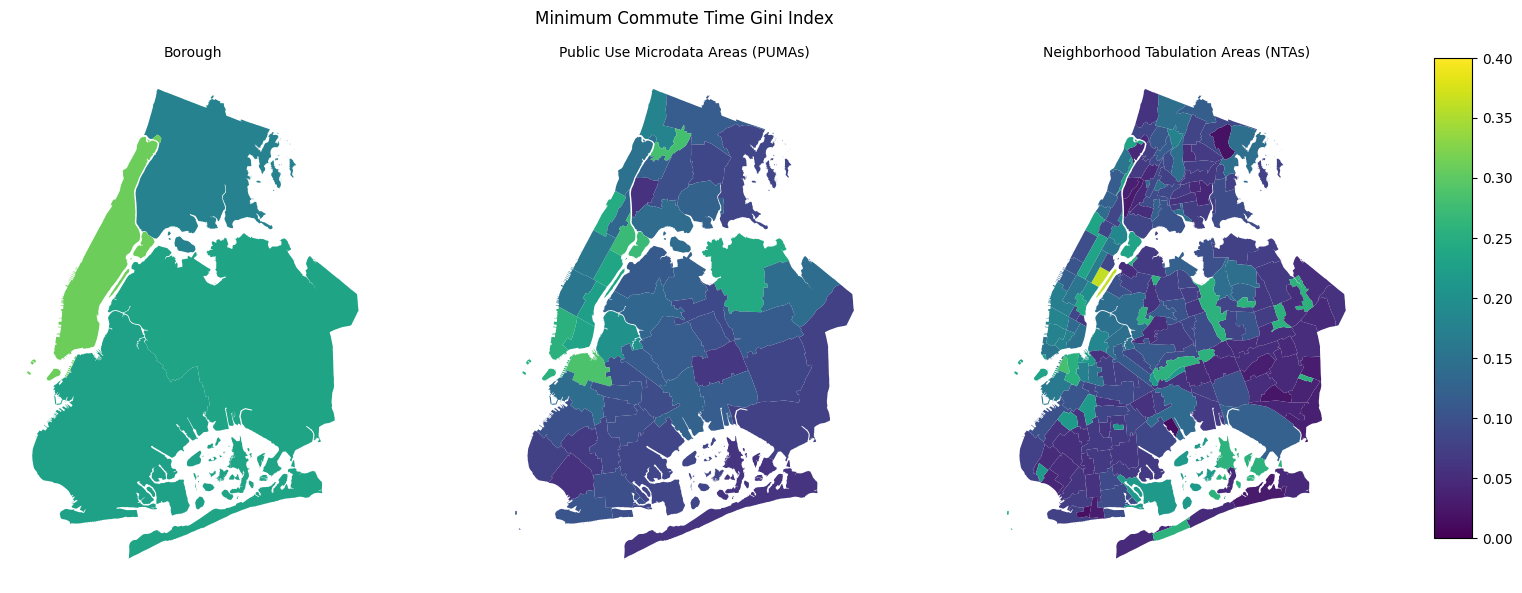

In [144]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

title_ls = ['Borough','Public Use Microdata Areas (PUMAs)','Neighborhood Tabulation Areas (NTAs)']
fig,ax = plt.subplots(1,3,figsize = (15,6))

i = 0
for df in [boro,puma,nta]:
    df.plot(column = 'gini_min',ax = ax[i],vmin = 0,vmax = .40)
    ax[i].axis('off')
    ax[i].set_title(title_ls[i],fontsize = 10)
    i += 1
fig.suptitle('Minimum Commute Time Gini Index')
fig.tight_layout()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(0, .40)
)

# define position and extent of colorbar
cb_ax = fig.add_axes([1, 0.1, 0.025, 0.8])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, orientation='vertical')
plt.savefig('../Outputs/Min_gini_spatial_graphs.png', bbox_inches='tight')
plt.show()

In [147]:
#repeat for weighted
for i in range(1,len(weighted_ginis)):
    if i == 1:
        boro_dict = {geo_ls[i-1][j]: weighted_ginis[i][j] for j in range(len(weighted_ginis[i]))}
    elif i == 2:
        puma_dict = {geo_ls[i-1][j]: weighted_ginis[i][j] for j in range(len(weighted_ginis[i]))}
    elif i == 3:
        nta_dict = {geo_ls[i-1][j]: weighted_ginis[i][j] for j in range(len(weighted_ginis[i]))}

In [148]:
boro['gini_w'] = boro['boro_name'].map(boro_dict)
puma['gini_w'] = puma['puma'].map(puma_dict)
nta['gini_w'] = nta['ntaname'].map(nta_dict)

In [149]:
print(boro['gini_w'].max(),puma['gini_w'].max(),nta['gini_w'].max())

0.1789242749504022 0.1274352116832465 0.16757138113075457


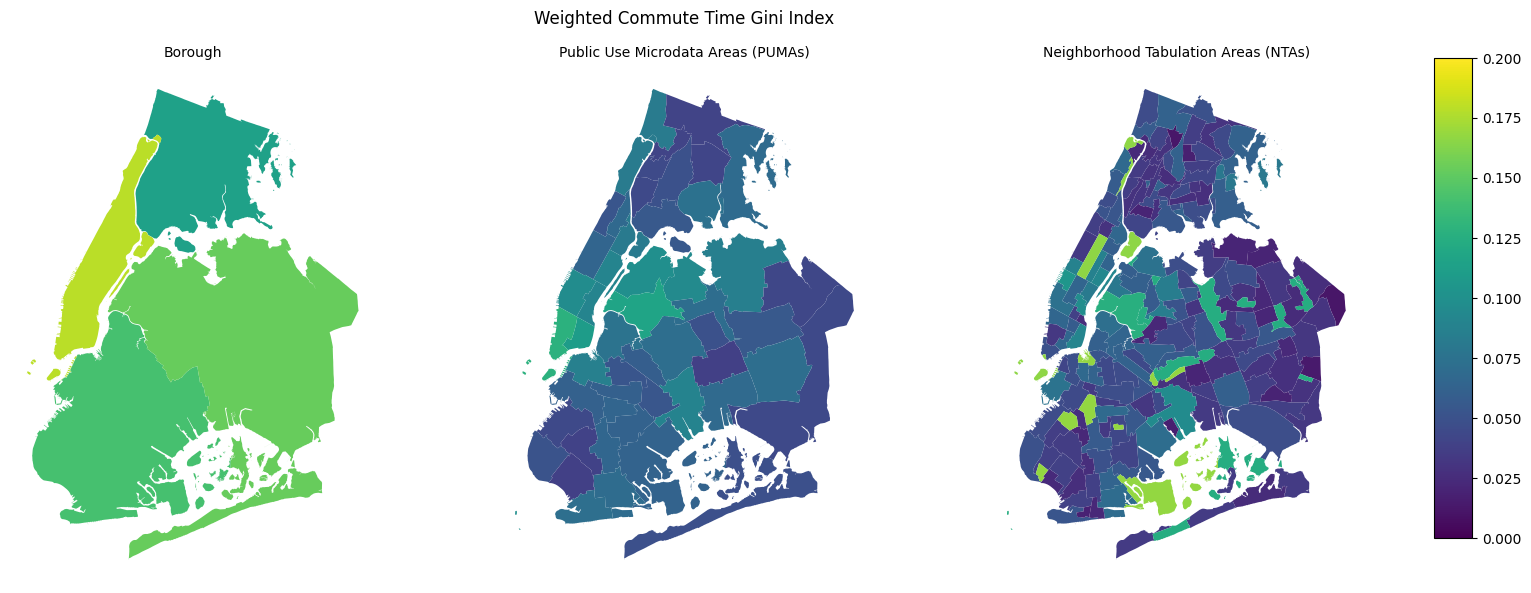

In [151]:
title_ls = ['Borough','Public Use Microdata Areas (PUMAs)','Neighborhood Tabulation Areas (NTAs)']
fig,ax = plt.subplots(1,3,figsize = (15,6))

i = 0
for df in [boro,puma,nta]:
    df.plot(column = 'gini_w',ax = ax[i],vmin = 0,vmax = .2)
    ax[i].axis('off')
    ax[i].set_title(title_ls[i],fontsize = 10)
    i += 1
fig.suptitle('Weighted Commute Time Gini Index')
fig.tight_layout()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(0, .20)
)

# define position and extent of colorbar
cb_ax = fig.add_axes([1, 0.1, 0.025, 0.8])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, orientation='vertical')
plt.savefig('../Outputs/weight_gini_spatial_graphs.png', bbox_inches='tight')
plt.show()